# COGS 108 - 2020-2021 Premier League performance analysis

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Our group wanted to find how the performance of a team in a given season is impacted by their past performances and transfer activity. For this, we first defined metrics such as number of wins, losses, and goals scored to measure performance and amount spent and age of transferred players to measure transfer activity. We then performed data analysis and inference on cleaned Premier League table and transfer data dating from the 1995-1996 season and noticed that, expectedly, winning more games, conceding less goals, maintaining a large goal difference, and investing more on transfers were strong predictors of success in the next season, and vice versa. However, unexpectedly, age of players, goal scored, and number of draws were poor predictors of current performance.

# Names

- Manav Ram
- Vishaal Ramaswamy Kasi Vasu
- Justin Phen
- Dhanush Nanjunda-Reddy

<a id='research_question'></a>
# Research Question

Is the number of points a Soccer team accumulates in a given season affected by their Past Performances and Past Transfer Activity?

The number of points a team receives in a season is calculated by the number of wins, losses, and draws from the 38 matches they play as follows:
1. The team recieves 3 points if they win a match
2. The team recieves 1 point if they draw a match
3. The team receives 0 points if they lose a match
4. The total points would be the sum of points they receive from the 38 matches they play.

We define Past Performance and Past Transfer Activity by the following metrics:
1. Past Performance:
    1. Number Of Wins, Draws and Losses from the previous season
    2. Position In the Table at the end of the previous season
    3. Goal Scored Vs Goals Received in the previous season
    4. Performance in Home and Away Matches during the previous season
2. Past Transfer Activity:
    1. Amount paid for Transfers in the previous transfer window
    2. Amount received from Transfers in the previous transfer window
    3. Ages and Positions of the players joining/leaving the club in the previous transfer window

<a id='background'></a>

## Background & Prior Work

The Premier League is England’s highest-level soccer division, consisting of 20 teams and 38 matches per season. Teams compete yearly, with each season running from August to May, and are provided an opportunity to sign new players during the Summer and Winter transfer windows. The Summer transfer window is open from June 9th to August 31st before the start of a given season, and the Winter transfer window is open from January 1st to 31st during the season.

Transfer windows are a period of time when soccer teams are allowed to transfer players in and out of their teams through different methods. The most popular one is through a transfer fee, which is a fee that a team pays when they want to receive/add players to their team. Usually, that transfer fee is determined by several factors, including the player’s current market value, as well as additional add ons. Add ons are conditions that are added to the main contract of a player, which includes additional financial gains that the selling team receives through the player’s performance at their new team (amount of appearances, goals, assists…). Another method is through a player swap deal, which is when a club offers their own players in exchange for the player or players they want to receive. 

The summer and January transfer window can drastically affect team performances each season. Our project compares the impact of past performances and transfer activity in relation to their current season's performance.

References (include links):
- https://www.premierleague.com/premier-league-explained

- https://towardsdatascience.com/predicting-soccer-team-strength-version-ii-11b5c66cf9d8

- https://www.skysports.com/football/news/11095/12257542/summer-transfer-window-2021-when-does-it-open-news-dates-and-deadline-day

- https://www.espn.com/soccer/english-premier-league/story/4480113/when-does-the-january-transfer-window-open-and-close

# Hypothesis


We believe that the performance of a team in a given season will be positively impacted by their past performances and transfer activity. We argue that teams that perform better in the previous season or spend more money during the transfer market will perform better in the current season. Generally, when teams spend money on players they will improve as squad strength increases, and vice versa, if they sell players. Past performances can also be impactful as a good season can boost a team’s morale and chemistry that leads to an even better season.

# Dataset(s)

* Dataset descriptions and variables can be found under the corresponding Data Cleaning sections.

#### Dataset 1 - Match Results
- Dataset Name: engsoccerdata
- Link to the dataset: https://github.com/jalapic/engsoccerdata
- Number of observations: Originally the dataset had 199884 observations for matches that have taken place in England since 1888. After filtering the dataset to only have matches from the Premier League (which started in 1992), we found that the dataset has about 10886 observations.
- Description: This dataset contains the results from soccer matches that have taken place in England from the season that started in 1888 (1888-1889) to the season that started in 2019 (2019-2020). For each match, the dataset contains information about when the match took place, the teams that took part in the match, which team won (home team or away team), the full time score, the number of goals scored by the home and away teams, and the final result of the match.

#### Dataset 2 - 2020 Match Results
- Dataset Name: match_results_2020.csv
- Link to the dataset: https://www.premierleague.com/
- Number of observations: We scraped information corresponding to the 380 matches that took place during the 2020-2021 Premier League Season, and each match is represented by one observation in our dataset.
- Desciption: We scraped the results from every match that took place in the season that started in 2020 (2020-2021 season) from the official premier league website. Similar to the previous dataset, for every match this dataset contains information about the teams that took part in the match, which team won (home team or away team), the full time score, the number of goals scored by the home and away teams, and the final result of the match.

#### Dataset 3 - All Transfers
- Dataset Name: engsoccerdata
- Link to the dataset: https://github.com/ewenme/transfers
- Number of observations: The dataset has 30 csv files containing player transfer information from each of the 30 seasons of the premier league from the 1992 Season to the 2021 Season. We filtered the datasets to only contain information from the 1995 Season onwards, and we now have 20831 observations.
- Desciption: We scraped the results from every match that took place in the season that started in 2020 (2020-2021 season) from the official premier league website. Similar to the previous dataset, for every match this dataset contains information about the teams that took part in the match, which team won (home team or away team), the full time score, the number of goals scored by the home and away teams, and the final result of the match.


#### Combining Datasets:
1. We have combined the Match Results data sets with the 2020 Match Results dataset, to store information about all of the premier league matches that have taken place from the 1995 Season to the 2020 Season.
2. After converting the combined Match Results dataset into a dataframe that contains information relating to the total number of wins, draws, losses, goals scored, etc. for every team in every season, we map a team in a season to what that team did during that specific season according to the All Transfers dataset. We included information like the total amount the team spent in that season, the total amount they received in that season, the number of players that joined/left the team that season, etc.


# Setup

In [1]:
import pandas as pd
!pip install pyreadr
import pyreadr
import numpy as np
import math
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns

from os.path import exists
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from collections import defaultdict

Defaulting to user installation because normal site-packages is not writeable


# Data Cleaning

## Cleaning Match Results:

#### Part 1 - Cleaning the Matches from 1996-2019

The `engsoccerdata` dataset only contains information for matches that took place from 1888-2019 (the season that started in 1888 to the season that started in 2019). The Premier League was started in 1992 with 22 teams, and in 1995, the number of teams was brought down to 20. So, we're only going to consider the matches that have taken place after the 1995 season started.

Each observation contains the following information about a specific match:
1. Date of the Match
2. Which Season did the Match take place in?
3. The Home Team
4. The Away Team
5. The Full Time Score
6. Goals Scored by the home team
7. Goals Scored by the away team
8. The Division and tiers of the league in England in which this match took place.
9. The goal difference
10. A column result with the following categories:
    1. "A" - Away Team Won
    2. "D" - Draw
    3. "H" - Home Team Won

We need to remove the following unnecessary variables:
1. `FT` - The Full Time Score.
2. `division` and `tier` - The division and tier that the match took place in
3. `totgoal'` - The total number of goals in a match.
4. `Date` - The date of the match.

The Full Time Score isn't needed because we are maintaining the number of home goals, the number of away (or visitor) goals and the names of the home and away teams. The divison and tier variables aren't needed because they represent the different leagues that take place in England. We are only considering the Premier League (or divison 1). Finally, we don't plan on using the total number of goals in a match as a metric. If during EDA we decide that it is important, we could always recompute this variable from the home and away goals. The `Season` variable gives us the same information that we need from `Date`, so we can drop the `Date` variable after using it for filtering.

In [2]:
folder = "/home/mram/Group009-Fa21/Data/MatchResults/"
result = pyreadr.read_r(folder + "england.rda")
df1 = result["england"]
df1

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1888-09-08,1888.0,Bolton Wanderers,Derby County,3-6,3,6,1,1.0,9,-3,A
1,1888-09-08,1888.0,Everton,Accrington F.C.,2-1,2,1,1,1.0,3,1,H
2,1888-09-08,1888.0,Preston North End,Burnley,5-2,5,2,1,1.0,7,3,H
3,1888-09-08,1888.0,Stoke City,West Bromwich Albion,0-2,0,2,1,1.0,2,-2,A
4,1888-09-08,1888.0,Wolverhampton Wanderers,Aston Villa,1-1,1,1,1,1.0,2,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
199879,2020-03-07,2019.0,Plymouth Argyle,Macclesfield,3-0,3,0,4,4.0,3,3,H
199880,2020-03-07,2019.0,Salford City,Bradford City,2-0,2,0,4,4.0,2,2,H
199881,2020-03-07,2019.0,Swindon Town,Forest Green Rovers,0-2,0,2,4,4.0,2,-2,A
199882,2020-03-07,2019.0,Walsall,Exeter City,3-1,3,1,4,4.0,4,2,H


We first convert all of the strings that represent dates, into date time objects, so that we can effectively filter out matches that took place before 1992.

In [3]:
import datetime
def stringToDate(x):
    x = x.split('-')
    y = int(x[0], base = 10)
    m = int(x[1], base = 10)
    d = int(x[2], base = 10)
    return datetime.datetime(y,m,d)
df1['Date'] = df1['Date'].apply(lambda x: stringToDate(x))
df1['Date']

0        1888-09-08
1        1888-09-08
2        1888-09-08
3        1888-09-08
4        1888-09-08
            ...    
199879   2020-03-07
199880   2020-03-07
199881   2020-03-07
199882   2020-03-07
199883   2020-03-10
Name: Date, Length: 199884, dtype: datetime64[ns]

Using the date column, the division and the season we now filter the dataframe to only contain Premier League Matches from the 1996 Season onwards.

In [4]:
MatchResults = df1[(df1['Date'] >= datetime.datetime(1992,8,15)) & (df1['division'] == '1') ]
MatchResults = MatchResults[MatchResults['Season'] >= 1995] # Only considering from the 1996 season to 2019 season
MatchResults = MatchResults.reset_index(drop=True)
MatchResults

,Date,Season,home,visitor,FT,hgoal,vgoal,division,tier,totgoal,goaldif,result
0,1995-08-19,1995.0,Aston Villa,Manchester United,3-1,3,1,1,1.0,4,2,H
1,1995-08-19,1995.0,Blackburn Rovers,Queens Park Rangers,1-0,1,0,1,1.0,1,1,H
2,1995-08-19,1995.0,Chelsea,Everton,0-0,0,0,1,1.0,0,0,D
3,1995-08-19,1995.0,Liverpool,Sheffield Wednesday,1-0,1,0,1,1.0,1,1,H
4,1995-08-19,1995.0,Manchester City,Tottenham Hotspur,1-1,1,1,1,1.0,2,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
9495,2020-07-26,2019.0,Leicester City,Manchester United,0-2,0,2,1,1.0,2,-2,A
9496,2020-07-26,2019.0,Manchester City,Norwich City,5-0,5,0,1,1.0,5,5,H
9497,2020-07-26,2019.0,Newcastle United,Liverpool,1-3,1,3,1,1.0,4,-2,A
9498,2020-07-26,2019.0,Southampton,Sheffield United,3-1,3,1,1,1.0,4,2,H


In [5]:
MatchResults.dtypes

Date        datetime64[ns]
Season             float64
home                object
visitor             object
FT                  object
hgoal                int32
vgoal                int32
division            object
tier               float64
totgoal              int32
goaldif              int32
result              object
dtype: object

In [6]:
MatchResults = MatchResults.drop(['FT','tier','division','totgoal','Date'], axis=1)
MatchResults

,Season,home,visitor,hgoal,vgoal,goaldif,result
0,1995.0,Aston Villa,Manchester United,3,1,2,H
1,1995.0,Blackburn Rovers,Queens Park Rangers,1,0,1,H
2,1995.0,Chelsea,Everton,0,0,0,D
3,1995.0,Liverpool,Sheffield Wednesday,1,0,1,H
4,1995.0,Manchester City,Tottenham Hotspur,1,1,0,D
...,...,...,...,...,...,...,...
9495,2019.0,Leicester City,Manchester United,0,2,-2,A
9496,2019.0,Manchester City,Norwich City,5,0,5,H
9497,2019.0,Newcastle United,Liverpool,1,3,-2,A
9498,2019.0,Southampton,Sheffield United,3,1,2,H


Now, we check if the data is correct. There should only be 20 teams in each season. So, we group the data by season and count the number of unique teams from each season.

In [7]:
homeTeams = MatchResults.groupby("Season")
homeTeams['home'].nunique()

Season
1995.0    20
1996.0    20
1997.0    20
1998.0    20
1999.0    20
2000.0    20
2001.0    20
2002.0    20
2003.0    20
2004.0    20
2005.0    20
2006.0    20
2007.0    20
2008.0    20
2009.0    20
2010.0    20
2011.0    20
2012.0    20
2013.0    20
2014.0    20
2015.0    20
2016.0    20
2017.0    20
2018.0    20
2019.0    20
Name: home, dtype: int64

In [8]:
awayTeams = MatchResults.groupby("Season")
awayTeams['visitor'].nunique()

Season
1995.0    20
1996.0    20
1997.0    20
1998.0    20
1999.0    20
2000.0    20
2001.0    20
2002.0    20
2003.0    20
2004.0    20
2005.0    20
2006.0    20
2007.0    20
2008.0    20
2009.0    20
2010.0    20
2011.0    20
2012.0    20
2013.0    20
2014.0    20
2015.0    20
2016.0    20
2017.0    20
2018.0    20
2019.0    20
Name: visitor, dtype: int64

Now we check if 380 matches were played in each of these seasons.

In [9]:
MatchResults.groupby("Season")['result'].count()

Season
1995.0    380
1996.0    380
1997.0    380
1998.0    380
1999.0    380
2000.0    380
2001.0    380
2002.0    380
2003.0    380
2004.0    380
2005.0    380
2006.0    380
2007.0    380
2008.0    380
2009.0    380
2010.0    380
2011.0    380
2012.0    380
2013.0    380
2014.0    380
2015.0    380
2016.0    380
2017.0    380
2018.0    380
2019.0    380
Name: result, dtype: int64

We rename the columns that contain the term `visitor` with the term `away` to match current terminology.

In [10]:
MatchResults = MatchResults.rename(columns={"visitor": "away", "vgoal": "agoal"})
MatchResults

,Season,home,away,hgoal,agoal,goaldif,result
0,1995.0,Aston Villa,Manchester United,3,1,2,H
1,1995.0,Blackburn Rovers,Queens Park Rangers,1,0,1,H
2,1995.0,Chelsea,Everton,0,0,0,D
3,1995.0,Liverpool,Sheffield Wednesday,1,0,1,H
4,1995.0,Manchester City,Tottenham Hotspur,1,1,0,D
...,...,...,...,...,...,...,...
9495,2019.0,Leicester City,Manchester United,0,2,-2,A
9496,2019.0,Manchester City,Norwich City,5,0,5,H
9497,2019.0,Newcastle United,Liverpool,1,3,-2,A
9498,2019.0,Southampton,Sheffield United,3,1,2,H


#### Part 2 - Scraping and cleaning Match data from the 2020 Season

We collect our data for the 2020 season's matches from https://www.premierleague.com/.

In [11]:
def remove_team_code(name):

    # team codes
    team_codes = ["BUR","CRY","ARS","LIV","BHA","MUN","NEW","CHE","SOU",\
                  "MCI","TOT","LEI","WHU","EVE","WOL","AVL","LEE","FUL","SHU","WBA"]
    
    # look for codes in name, if found, remove
    for c in team_codes:
        name = name.replace(c,'')
        
    name = name.rstrip()
        
    return name

In [12]:
def extract_epl_match_details(match_ids):
    
    epl_url = "https://www.premierleague.com/match/"

    data = dict()

    for match_id in match_ids:

        # url for each math
        match_url = epl_url + str(match_id)

        # download page, call and then close client
        uClient = uReq(match_url)
        results_page = uClient.read()
        uClient.close()

        # extract html
        results_soup = soup(results_page, "html.parser")

        # extract home team name container
        home_team_container = results_soup.findAll("div", {"class":"team home"})

        # extract away team name container
        away_team_container = results_soup.findAll("div", {"class":"team away"})

        # extract score container
        score_container = results_soup.findAll("div", {"class":"matchScoreContainer"})

        # extract team names from their containers
        team_names = {"home": remove_team_code(home_team_container[0].text.strip()),\
                      "visitor":remove_team_code(away_team_container[0].text.strip())}

        # extract score from score container
        score = {"hgoal": int(((score_container[0].text).split("-"))[0]),\
                 "vgoal":int(((score_container[0].text).split("-"))[1]) }
        
#         match_date = {"Date": match_date_container}

        # use score to determine match outcome, Win for home team = 1, Win for away team = -1, draw = 0
        result = {"result":  'H' if score["hgoal"] > score["vgoal"] else\
                  'A' if score["vgoal"] > score["hgoal"] else 'D' }
        
        season = {"Season": 2020.0}
        fulltime = {"FT": score_container[0].text.strip()}
        division = {"division": 1}
        tier = {"tier": 1.0}
        totalgoals = {"totgoal": (score['hgoal'] + score['vgoal'])}
        goaldifference = {"goaldif": (score['hgoal'] - score['vgoal'])}


        # append to data dictionary
        data[match_id] = [season, team_names, fulltime, score, division, tier, totalgoals, goaldifference, result]

    return data

In [13]:
def convert_to_dataframe(data, match_ids):
    
    # index and columns used to initialize return dataframe 
    index = [0]
    columns = ["home", "visitor", "hgoal", "vgoal","result"]

    # initialize dataframe with one empty row
    data_df = pd.DataFrame(index=index,columns=columns)

    # append match info for each match in turn to return dataframe 
    for match_id in match_ids:
        temp_df = pd.DataFrame.from_dict(data[match_id][0],orient="index")
        for i in [1,2,3,4,5,6,7,8]:
            temp_df= pd.concat([temp_df,pd.DataFrame.from_dict(data[match_id][i],orient="index")])
        temp_df = temp_df.T
        data_df = data_df.append(temp_df)

    # remove the empty first row
    data_df = data_df.iloc[1:]

    # make the indices equal to the match ids
    data_df.index = match_ids
    
    return data_df

In [14]:
df_2020 = None
if exists(folder+"match_results_2020.csv") == False:
    # there are 380 matches played in a season, there are 20 teams and each team plays every other team twice. 
    num_matches_2020 = 380

    # list of match IDs for the games played last season
    match_ids_2020 = [58896+i for i in range(num_matches_2020)]


    # extract data for 2020 season
    data_2020 = extract_epl_match_details(match_ids_2020)

    # # convert data from dictionary to dataframe
    df_2020 = convert_to_dataframe(data_2020,match_ids_2020)

    # # export dataframe as csv file
    df_2020.to_csv(folder+"match_results_2020.csv", sep = ',')

    df_2020.head()
else:
    df_2020 = pd.read_csv(folder+"match_results_2020.csv")

In [15]:
df_2020

,Unnamed: 0,home,visitor,hgoal,vgoal,result,Season,FT,division,tier,totgoal,goaldif
0,58896,Burnley,Manchester United,0,1,A,2020.0,0-1,1,1.0,1,-1
1,58897,Crystal Palace,Southampton,1,0,H,2020.0,1-0,1,1.0,1,1
2,58898,Fulham,Arsenal,0,3,A,2020.0,0-3,1,1.0,3,-3
3,58899,Liverpool,Leeds United,4,3,H,2020.0,4-3,1,1.0,7,1
4,58900,Manchester City,Aston Villa,2,0,H,2020.0,2-0,1,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
375,59271,Liverpool,Crystal Palace,2,0,H,2020.0,2-0,1,1.0,2,2
376,59272,Manchester City,Everton,5,0,H,2020.0,5-0,1,1.0,5,5
377,59273,Sheffield United,Burnley,1,0,H,2020.0,1-0,1,1.0,1,1
378,59274,West Ham United,Southampton,3,0,H,2020.0,3-0,1,1.0,3,3


In [16]:
df_2020 = df_2020.drop(['Unnamed: 0', 'division', 'tier', 'totgoal'], axis = 1)
df_2020 = df_2020.rename(columns={"visitor": "away", "vgoal": "agoal"})
df_2020 = df_2020[["Season","home","away","hgoal","agoal","goaldif","result"]]
df_2020

,Season,home,away,hgoal,agoal,goaldif,result
0,2020.0,Burnley,Manchester United,0,1,-1,A
1,2020.0,Crystal Palace,Southampton,1,0,1,H
2,2020.0,Fulham,Arsenal,0,3,-3,A
3,2020.0,Liverpool,Leeds United,4,3,1,H
4,2020.0,Manchester City,Aston Villa,2,0,2,H
...,...,...,...,...,...,...,...
375,2020.0,Liverpool,Crystal Palace,2,0,2,H
376,2020.0,Manchester City,Everton,5,0,5,H
377,2020.0,Sheffield United,Burnley,1,0,1,H
378,2020.0,West Ham United,Southampton,3,0,3,H


In [17]:
df_2020.dtypes

Season     float64
home        object
away        object
hgoal        int64
agoal        int64
goaldif      int64
result      object
dtype: object

#### Part 3 - Merging Match results with the results from the 2020 Season

In [18]:
MatchResults = pd.concat([MatchResults, df_2020], axis=0).reset_index(drop=True)
MatchResults

,Season,home,away,hgoal,agoal,goaldif,result
0,1995.0,Aston Villa,Manchester United,3,1,2,H
1,1995.0,Blackburn Rovers,Queens Park Rangers,1,0,1,H
2,1995.0,Chelsea,Everton,0,0,0,D
3,1995.0,Liverpool,Sheffield Wednesday,1,0,1,H
4,1995.0,Manchester City,Tottenham Hotspur,1,1,0,D
...,...,...,...,...,...,...,...
9875,2020.0,Liverpool,Crystal Palace,2,0,2,H
9876,2020.0,Manchester City,Everton,5,0,5,H
9877,2020.0,Sheffield United,Burnley,1,0,1,H
9878,2020.0,West Ham United,Southampton,3,0,3,H


## Cleaning Transfers:

The transfers dataset contains player transfer information involving Premier League Clubs from 1995 to 2021. The following information is provided for each transfer:
1. Premier League Club Involved
2. Player Name
3. Age of the Player
4. Player's position
5. The club the player is joining/leaving
6. Fee involved
7. Did the player join the team or leave the team?
8. Did the transfer happen during the Summer window or the Winter window?
9. Cleaned information about transfer fee
10. League Name (Premier League in this case)
11. Year of the transfer
12. Which Season did the transfer take place in?

First, we combine all of the transfers from each of their individuals csv files, into the `allTransfers` dataframe.

In [19]:
folder = "/home/mram/Group009-Fa21/Data/Transfers/"
allTransfers = pd.read_csv(folder+'1995/english_premier_league.csv')
for i in range(1996,2022):
    allTransfers = pd.concat([allTransfers, pd.read_csv(folder+str(i)+'/english_premier_league.csv')])
allTransfers = allTransfers.reset_index(drop=True)
allTransfers

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Aston Villa,Mark Draper,24.0,Attacking Midfield,Leicester,£4.39m,in,Summer,4.390,Premier League,1995,1995/1996
1,Aston Villa,Gareth Southgate,24.0,Centre-Back,Crystal Palace,£3.38m,in,Summer,3.380,Premier League,1995,1995/1996
2,Aston Villa,Savo Milosevic,21.0,Centre-Forward,Partizan,£1.35m,in,Summer,1.350,Premier League,1995,1995/1996
3,Aston Villa,Carl Tiler,25.0,Centre-Back,Nottm Forest,£843Th.,in,Summer,0.843,Premier League,1995,1995/1996
4,Aston Villa,Aaron Lescott,16.0,Left-Back,Aston Villa U18,-,in,Summer,0.000,Premier League,1995,1995/1996
...,...,...,...,...,...,...,...,...,...,...,...,...
22129,Brighton & Hove Albion,Billy Arce,23.0,Left Winger,LDU Quito,"End of loanDec 31, 2021",in,Winter,0.000,Premier League,2021,2021/2022
22130,Leicester City,Sam Hughes,24.0,Centre-Back,Burton Albion,"End of loanJan 1, 2022",in,Winter,0.000,Premier League,2021,2021/2022
22131,Manchester City,Kayky,18.0,Right Winger,Fluminense,£9.00m,in,Winter,9.000,Premier League,2021,2021/2022
22132,Newcastle United,Jake Turner,22.0,Goalkeeper,Colchester Utd.,"End of loanJan 1, 2022",in,Winter,0.000,Premier League,2021,2021/2022


1. We remove any row that is missing any information in `fee_cleaned`.
2. We then remove the following variables for each observation:
    1. Uncleaned fee amount
    2. Player name
    3. The second club's name - We only want to know the transfer information relating to the Premier League Club involved.
    4. Season - Same as the year, but in an uncleaned form
    5. League Name - All transfers are to/from Premier League Clubs, so this information is not necessary.
3. We then transform all of the years into `floats`, to match the MatchResults dataset.
4. We rename the columns to match the MatchResults dataset.
5. Finally, we confirm that the data types of all of the variables are consistent.

In [20]:
allTransfers = allTransfers.dropna(subset=['fee_cleaned','age'])
allTransfers.drop(columns=['fee', 'player_name', 'club_involved_name', 'season', 'league_name'], inplace=True)
allTransfers['year'] = allTransfers['year'].astype('float')
allTransfers = allTransfers.rename(columns={"fee_cleaned": "fee", "year": "Season"})
allTransfers = allTransfers.reset_index(drop=True)
allTransfers

,club_name,age,position,transfer_movement,transfer_period,fee,Season
0,Aston Villa,24.0,Attacking Midfield,in,Summer,4.390,1995.0
1,Aston Villa,24.0,Centre-Back,in,Summer,3.380,1995.0
2,Aston Villa,21.0,Centre-Forward,in,Summer,1.350,1995.0
3,Aston Villa,25.0,Centre-Back,in,Summer,0.843,1995.0
4,Aston Villa,16.0,Left-Back,in,Summer,0.000,1995.0
...,...,...,...,...,...,...,...
20815,Brighton & Hove Albion,23.0,Left Winger,in,Winter,0.000,2021.0
20816,Leicester City,24.0,Centre-Back,in,Winter,0.000,2021.0
20817,Manchester City,18.0,Right Winger,in,Winter,9.000,2021.0
20818,Newcastle United,22.0,Goalkeeper,in,Winter,0.000,2021.0


In [21]:
allTransfers.dtypes

club_name             object
age                  float64
position              object
transfer_movement     object
transfer_period       object
fee                  float64
Season               float64
dtype: object

Now, we are going to ensure that the team names in `MatchResults` matches the team names in `allTransfers`.

In [22]:
matchResultsClubs = set(MatchResults["home"])
allTransfersClubs = set(allTransfers["club_name"])
matchResultsClubs

{'AFC Bournemouth',
 'Arsenal',
 'Aston Villa',
 'Barnsley',
 'Birmingham City',
 'Blackburn Rovers',
 'Blackpool',
 'Bolton Wanderers',
 'Bradford City',
 'Brighton & Hove Albion',
 'Brighton and Hove Albion',
 'Burnley',
 'Cardiff City',
 'Charlton Athletic',
 'Chelsea',
 'Coventry City',
 'Crystal Palace',
 'Derby County',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Ipswich Town',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle United',
 'Norwich City',
 'Nottingham Forest',
 'Portsmouth',
 'Queens Park Rangers',
 'Reading',
 'Sheffield United',
 'Sheffield Wednesday',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wigan Athletic',
 'Wimbledon',
 'Wolverhampton Wanderers'}

Since `Brighton and Hove Albion` and `Brighton & Hove Albion` are the same team, we need to clean `MatchResults` and `allTransfers` to only hold `Brighton and Hove Albion` instead of `Brighton & Hove Albion`.

In [23]:
MatchResults["home"] = MatchResults["home"].apply(lambda x: "Brighton and Hove Albion" if x == "Brighton & Hove Albion" else x)
MatchResults["away"] = MatchResults["away"].apply(lambda x: "Brighton and Hove Albion" if x == "Brighton & Hove Albion" else x)
allTransfers['club_name'] = allTransfers['club_name'].apply(lambda x: "Brighton and Hove Albion" if x == "Brighton & Hove Albion" else x)
matchResultsClubs = set((MatchResults["home"])).union(set(MatchResults["away"])) # Teams in MatchResults
allTransfersClubs = set(allTransfers["club_name"]) # Teams in allTransfers

In [24]:
for team in allTransfersClubs:
    if team not in matchResultsClubs:
        print(team)

Reading FC
Burnley FC
Watford FC
Fulham FC
Middlesbrough FC
Everton FC
Chelsea FC
Arsenal FC
Liverpool FC
Barnsley FC
Blackpool FC
Wimbledon FC
Southampton FC
Portsmouth FC
Brentford FC
Sunderland AFC


We need to remove the "FC" (Football Club) from these team names so that they match the team names in `MatchResults`.

In [25]:
allTransfers['club_name'] = allTransfers['club_name'].apply(lambda x: x.split(' ')[0] if x not in matchResultsClubs else x)
allTransfersClubs = set(allTransfers["club_name"])
for team in allTransfersClubs:
    if team not in matchResultsClubs:
        print(team)

Brentford


In [26]:
len(allTransfersClubs),len(matchResultsClubs)

(48, 47)

In [27]:
matchResultsClubs

{'AFC Bournemouth',
 'Arsenal',
 'Aston Villa',
 'Barnsley',
 'Birmingham City',
 'Blackburn Rovers',
 'Blackpool',
 'Bolton Wanderers',
 'Bradford City',
 'Brighton and Hove Albion',
 'Burnley',
 'Cardiff City',
 'Charlton Athletic',
 'Chelsea',
 'Coventry City',
 'Crystal Palace',
 'Derby County',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Ipswich Town',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle United',
 'Norwich City',
 'Nottingham Forest',
 'Portsmouth',
 'Queens Park Rangers',
 'Reading',
 'Sheffield United',
 'Sheffield Wednesday',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wigan Athletic',
 'Wimbledon',
 'Wolverhampton Wanderers'}

Since Brentford only entered the Premier league during the 2021-2022 season, `Brentford` exists in `allTransfers`, but doesn't exist in `MatchResults`. Since, the last season that was completed was the 2020-2021 season (which we scraped and stored in `MatchResults`, we can remove any rows in `allTransfers` that deals with the club `Brentford`.

In [28]:
allTransfers = allTransfers[allTransfers["club_name"] != "Brentford"]

In [29]:
allTransfers["club_name"].nunique(), MatchResults["home"].nunique()

(47, 47)

# Data Analysis & Results

First we are going to perform data analysis by creating a new dataframe containing the points that a team received in each season, along with their performance in the previous season.

In [30]:
MatchResults

,Season,home,away,hgoal,agoal,goaldif,result
0,1995.0,Aston Villa,Manchester United,3,1,2,H
1,1995.0,Blackburn Rovers,Queens Park Rangers,1,0,1,H
2,1995.0,Chelsea,Everton,0,0,0,D
3,1995.0,Liverpool,Sheffield Wednesday,1,0,1,H
4,1995.0,Manchester City,Tottenham Hotspur,1,1,0,D
...,...,...,...,...,...,...,...
9875,2020.0,Liverpool,Crystal Palace,2,0,2,H
9876,2020.0,Manchester City,Everton,5,0,5,H
9877,2020.0,Sheffield United,Burnley,1,0,1,H
9878,2020.0,West Ham United,Southampton,3,0,3,H


We iterate through every row in `MatchResults` and we count the number of wins, draws, losses, goals scored (and goals against) for each team, in every season, and store it in `ptsPerYear`.

In [31]:
ptsPerYear = defaultdict(lambda: defaultdict(lambda: defaultdict(int))) #Year -> Team - > Stats
for index, row in MatchResults.iterrows():
    season = row['Season']
    home = row['home']
    away = row['away']
    result = row['result']
    hGoal = row['hgoal']
    aGoal = row['agoal']
    
    # For home team
    ptsPerYear[season][home]['Goals Scored'] += hGoal
    ptsPerYear[season][home]['Goals Against'] += aGoal
    
    # For away team
    ptsPerYear[season][away]['Goals Scored'] += aGoal
    ptsPerYear[season][away]['Goals Against'] += hGoal
    
    if result == "H":
        ptsPerYear[season][home]['Wins'] += 1
        ptsPerYear[season][home]['Points'] += 3
        ptsPerYear[season][away]['Losses'] += 1
    elif result == "A":
        ptsPerYear[season][home]['Losses'] += 1
        ptsPerYear[season][away]['Wins'] += 1
        ptsPerYear[season][away]['Points'] += 3
    elif result == "D":
        ptsPerYear[season][home]['Draws'] += 1
        ptsPerYear[season][home]['Points'] += 1
        
        ptsPerYear[season][away]['Draws'] += 1
        ptsPerYear[season][away]['Points'] += 1

In [32]:
ptsPerYear[2020]["Sheffield United"]

defaultdict(int,
            {'Goals Scored': 20,
             'Goals Against': 63,
             'Losses': 29,
             'Draws': 2,
             'Points': 23,
             'Wins': 7})

We now create a new datafram `performancePerYear`, to hold the stats we just stored in `ptsPerYear`.

In [33]:
performancePerYear = pd.DataFrame(columns=["Season","Team","Wins","Draws","Losses","Goals Scored","Goals Against","Points"])
performancePerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Points


In [34]:
for year in ptsPerYear:
    for team in ptsPerYear[year]:
        wins = ptsPerYear[year][team]["Wins"]
        draws = ptsPerYear[year][team]["Draws"]
        losses = ptsPerYear[year][team]["Losses"]
        gs = ptsPerYear[year][team]["Goals Scored"]
        ga = ptsPerYear[year][team]["Goals Against"]
        pts = ptsPerYear[year][team]["Points"]
        row = [year,team,wins,draws,losses,gs,ga,pts]
        performancePerYear.loc[len(performancePerYear.index)] = row

In [35]:
performancePerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Points
0,1995.0,Aston Villa,18,9,11,52,35,63
1,1995.0,Manchester United,25,7,6,73,35,82
2,1995.0,Blackburn Rovers,18,7,13,61,47,61
3,1995.0,Queens Park Rangers,9,6,23,38,57,33
4,1995.0,Chelsea,12,14,12,46,44,50
...,...,...,...,...,...,...,...,...
515,2020.0,Newcastle United,12,9,17,46,62,45
516,2020.0,Brighton and Hove Albion,9,14,15,40,46,41
517,2020.0,Chelsea,19,10,9,58,36,67
518,2020.0,Sheffield United,7,2,29,20,63,23


Goal Difference in a season is calculated by subtracting `Goals Against` from `Goals Scored`.

In [36]:
performancePerYear["Goal Difference"] = performancePerYear["Goals Scored"] - performancePerYear["Goals Against"]

Finally, we swap the goal difference and points columns, to keep information related to goals close to each other.

In [37]:
columns = list(performancePerYear)
columns[-2], columns[-1] = columns[-1], columns[-2]
performancePerYear = performancePerYear[columns]
performancePerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points
0,1995.0,Aston Villa,18,9,11,52,35,17,63
1,1995.0,Manchester United,25,7,6,73,35,38,82
2,1995.0,Blackburn Rovers,18,7,13,61,47,14,61
3,1995.0,Queens Park Rangers,9,6,23,38,57,-19,33
4,1995.0,Chelsea,12,14,12,46,44,2,50
...,...,...,...,...,...,...,...,...,...
515,2020.0,Newcastle United,12,9,17,46,62,-16,45
516,2020.0,Brighton and Hove Albion,9,14,15,40,46,-6,41
517,2020.0,Chelsea,19,10,9,58,36,22,67
518,2020.0,Sheffield United,7,2,29,20,63,-43,23


In [38]:
performancePerYear = performancePerYear.sort_values(by=["Season","Points","Goal Difference", "Goals Scored"], ascending=False).reset_index(drop=True)
performancePerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points
0,2020.0,Manchester City,27,5,6,83,32,51,86
1,2020.0,Manchester United,21,11,6,73,44,29,74
2,2020.0,Liverpool,20,9,9,68,42,26,69
3,2020.0,Chelsea,19,10,9,58,36,22,67
4,2020.0,Leicester City,20,6,12,68,50,18,66
...,...,...,...,...,...,...,...,...,...
515,1995.0,Coventry City,8,14,16,42,60,-18,38
516,1995.0,Southampton,9,11,18,34,52,-18,38
517,1995.0,Manchester City,9,11,18,33,58,-25,38
518,1995.0,Queens Park Rangers,9,6,23,38,57,-19,33


Since, we want to predict the number of points a team would receive in the next season, based on the performance during a given season, let us also store the number of points a team receives in the next season, in the same row. For the 2020 season, we will just represent the points a team received in the next season as `NaN`.

In [39]:
def nextSeasonPoints(row):
    if row["Season"] == 2020.0:
        return np.nan
    else:
        if row["Team"] in ptsPerYear[row["Season"]+1]: #Did the team play in the premier league in the next season
            return ptsPerYear[row["Season"]+1][row["Team"]]["Points"]
        else:
            return 0 # Return 0 since the team was relegated, so they didn't play in the premier league.
performancePerYear["Points Next Season"] = performancePerYear.apply(lambda row: nextSeasonPoints(row), axis=1)
performancePerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points,Points Next Season
0,2020.0,Manchester City,27,5,6,83,32,51,86,NaN
1,2020.0,Manchester United,21,11,6,73,44,29,74,NaN
2,2020.0,Liverpool,20,9,9,68,42,26,69,NaN
3,2020.0,Chelsea,19,10,9,58,36,22,67,NaN
4,2020.0,Leicester City,20,6,12,68,50,18,66,NaN
...,...,...,...,...,...,...,...,...,...,...
515,1995.0,Coventry City,8,14,16,42,60,-18,38,41.0
516,1995.0,Southampton,9,11,18,34,52,-18,38,41.0
517,1995.0,Manchester City,9,11,18,33,58,-25,38,0.0
518,1995.0,Queens Park Rangers,9,6,23,38,57,-19,33,0.0


Now, we'll look into the `allTransfers` dataframe, to store important transfer statistics for each team in every season.

In [40]:
allTransfers

,club_name,age,position,transfer_movement,transfer_period,fee,Season
0,Aston Villa,24.0,Attacking Midfield,in,Summer,4.390,1995.0
1,Aston Villa,24.0,Centre-Back,in,Summer,3.380,1995.0
2,Aston Villa,21.0,Centre-Forward,in,Summer,1.350,1995.0
3,Aston Villa,25.0,Centre-Back,in,Summer,0.843,1995.0
4,Aston Villa,16.0,Left-Back,in,Summer,0.000,1995.0
...,...,...,...,...,...,...,...
20815,Brighton and Hove Albion,23.0,Left Winger,in,Winter,0.000,2021.0
20816,Leicester City,24.0,Centre-Back,in,Winter,0.000,2021.0
20817,Manchester City,18.0,Right Winger,in,Winter,9.000,2021.0
20818,Newcastle United,22.0,Goalkeeper,in,Winter,0.000,2021.0


In [41]:
allTransfers.groupby("position").count()

,club_name,age,transfer_movement,transfer_period,fee,Season
position,,,,,,
Attacking Midfield,924,924,924,924,924,924
Central Midfield,2342,2342,2342,2342,2342,2342
Centre-Back,3410,3410,3410,3410,3410,3410
Centre-Forward,4153,4153,4153,4153,4153,4153
Defender,180,180,180,180,180,180
Defensive Midfield,1244,1244,1244,1244,1244,1244
Forward,172,172,172,172,172,172
Goalkeeper,2425,2425,2425,2425,2425,2425
Left Midfield,438,438,438,438,438,438


To reduce the granularity of how positions of the players being transferred affect performance, we group the positions into three broad categories:
1. Attackers
2. Midfielders
3. Defenders (Goalkeepers included)

In [42]:
def positionTransform(position:str) -> str:
    if position in {"Centre-Forward","Forward","Second Striker","Left Winger","Right Winger"}:
        return "A"
    elif position in {"Attacking Midfield", "Central Midfield", "Defensive Midfield", "Left Midfield", "Right Midfield"}:
        return "M"
    else:
        return "D"
allTransfers['position'] = allTransfers["position"].apply(positionTransform)
allTransfers

,club_name,age,position,transfer_movement,transfer_period,fee,Season
0,Aston Villa,24.0,M,in,Summer,4.390,1995.0
1,Aston Villa,24.0,D,in,Summer,3.380,1995.0
2,Aston Villa,21.0,A,in,Summer,1.350,1995.0
3,Aston Villa,25.0,D,in,Summer,0.843,1995.0
4,Aston Villa,16.0,D,in,Summer,0.000,1995.0
...,...,...,...,...,...,...,...
20815,Brighton and Hove Albion,23.0,A,in,Winter,0.000,2021.0
20816,Leicester City,24.0,D,in,Winter,0.000,2021.0
20817,Manchester City,18.0,A,in,Winter,9.000,2021.0
20818,Newcastle United,22.0,D,in,Winter,0.000,2021.0


In [43]:
allTransfers.groupby("age")["Season"].count()

age
15.0       4
16.0     104
17.0     408
18.0    1323
19.0    1936
20.0    2321
21.0    2232
22.0    1749
23.0    1409
24.0    1230
25.0    1115
26.0    1023
27.0    1048
28.0     893
29.0     887
30.0     742
31.0     676
32.0     486
33.0     391
34.0     295
35.0     201
36.0     141
37.0      75
38.0      39
39.0      31
40.0      23
41.0       8
42.0       5
43.0       4
44.0       2
45.0       3
46.0       2
47.0       1
Name: Season, dtype: int64

Similarly, to reduce the granularity of how the ages of the players being transferred affect performance, we group the ages of the players into four broad categories:
1. 15-23 (Youth/Young Players)
2. 24 - 29 (Players in their prime)
3. 30-35 (Players who are past their prime)
4. 36+ (Players who are past their prime and will retire soon)

In [44]:
transferStatsPerYear = defaultdict(lambda: defaultdict(lambda: defaultdict(int))) # Season -> Team -> Stats
for index, row in allTransfers.iterrows():
    season = row['Season']
    club = row['club_name']
    age = row['age']
    position = row['position']
    isIn = True if row["transfer_movement"] == "in" else False
    fee = row["fee"]
        
    # For home team
    if isIn:
        transferStatsPerYear[season][club]["spent"] += fee
        transferStatsPerYear[season][club]["profit"] -= fee
        if age < 24:
            transferStatsPerYear[season][club]["15-23"] += 1
        elif age < 30:
            transferStatsPerYear[season][club]["24-29"] += 1
        elif age < 36:
            transferStatsPerYear[season][club]["30-35"] += 1
        else:
            transferStatsPerYear[season][club]["36+"] += 1
        if position == "A":
            transferStatsPerYear[season][club]["Att"] += 1
        elif position == "M":
            transferStatsPerYear[season][club]["Mid"] += 1
        else:
            transferStatsPerYear[season][club]["Def"] += 1
    else:
        transferStatsPerYear[season][club]["received"] += fee
        transferStatsPerYear[season][club]["profit"] += fee
        if age < 24:
            transferStatsPerYear[season][club]["15-23"] -= 1
        elif age < 30:
            transferStatsPerYear[season][club]["24-29"] -= 1
        elif age < 36:
            transferStatsPerYear[season][club]["30-35"] -= 1
        else:
            transferStatsPerYear[season][club]["36+"] -= 1
        if position == "A":
            transferStatsPerYear[season][club]["Att"] -= 1
        elif position == "M":
            transferStatsPerYear[season][club]["Mid"] -= 1
        else:
            transferStatsPerYear[season][club]["Def"] -= 1

In [45]:
transferStatsPerYear[2020]["Arsenal"]

defaultdict(int,
            {'spent': 75.6,
             'profit': -58.815,
             '24-29': 3,
             'Mid': 5,
             '15-23': 3,
             'Def': 2,
             '30-35': 1,
             'received': 16.785})

We now store all these transfer statistics in the dataframe `transfersPerYear`.

In [46]:
transfersPerYear = pd.DataFrame(columns=["Season","Team","Amount Spent","Amount Received","Profit","Att","Mid","Def", "15-23", "24-29", "30-35", "36+"])
for year in transferStatsPerYear:
    for team in transferStatsPerYear[year]:
        spent = transferStatsPerYear[year][team]["spent"]
        profit = transferStatsPerYear[year][team]["profit"]
        received = transferStatsPerYear[year][team]["received"]
        
        Att = transferStatsPerYear[year][team]["Att"]
        Mid = transferStatsPerYear[year][team]["Mid"]
        Def = transferStatsPerYear[year][team]["Def"]
        
        lessThan24 = transferStatsPerYear[year][team]["15-23"]
        lessThan30 = transferStatsPerYear[year][team]["24-29"]
        lessThan36 = transferStatsPerYear[year][team]["30-35"]
        above35 = transferStatsPerYear[year][team]["36+"]
        
        row = [year,team,spent,received,profit,Att,Mid,Def,lessThan24,lessThan30,lessThan36,above35]
        transfersPerYear.loc[len(transfersPerYear.index)] = row

Since the last completed season of the premier league was the 2020-2021 season (represented by `2020.0` in the dataframe), we filter out any instances of the `2021-2022` season (represented by `2021.0` in the dataframe).

In [47]:
transfersPerYear = transfersPerYear[transfersPerYear["Season"] != 2021]
transfersPerYear

,Season,Team,Amount Spent,Amount Received,Profit,Att,Mid,Def,15-23,24-29,30-35,36+
0,1995.0,Aston Villa,10.806,3.040,-7.766,1,0,1,4,1,-3,0
1,1995.0,Queens Park Rangers,4.811,10.879,6.068,-2,1,-2,3,-5,-1,0
2,1995.0,Sheffield Wednesday,11.490,5.677,-5.813,3,-1,-1,1,1,-2,1
3,1995.0,Wimbledon,0.657,4.050,3.393,2,0,2,3,2,-1,0
4,1995.0,Coventry City,5.768,2.314,-3.454,-1,0,3,5,-2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2020.0,Southampton,36.270,23.670,-12.600,4,2,8,8,5,1,0
516,2020.0,Tottenham Hotspur,99.450,11.970,-87.480,2,1,5,5,3,1,-1
517,2020.0,West Bromwich Albion,37.929,6.840,-31.089,3,-3,2,1,0,3,-2
518,2020.0,West Ham United,47.700,40.869,-6.831,0,-2,4,2,1,-1,0


Finally, we merge `transfersPerYear` and `performancePerYear` into one dataframe `allStatsPerYear`.

In [48]:
allStatsPerYear = pd.merge(performancePerYear, transfersPerYear, how='left', left_on=['Season','Team'], right_on = ['Season','Team'])
allStatsPerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points,Points Next Season,Amount Spent,Amount Received,Profit,Att,Mid,Def,15-23,24-29,30-35,36+
0,2020.0,Manchester City,27,5,6,83,32,51,86,NaN,154.620,55.490,-99.130,11,5,5,20,3,-2,0
1,2020.0,Manchester United,21,11,6,73,44,29,74,NaN,75.150,16.560,-58.590,2,1,3,4,1,1,0
2,2020.0,Liverpool,20,9,9,68,42,26,69,NaN,73.233,38.880,-34.353,4,5,2,8,5,-1,-1
3,2020.0,Chelsea,19,10,9,58,36,22,67,NaN,222.480,51.570,-170.910,5,6,11,9,12,1,0
4,2020.0,Leicester City,20,6,12,68,50,18,66,NaN,55.800,48.400,-7.400,2,4,3,5,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1995.0,Coventry City,8,14,16,42,60,-18,38,41.0,5.768,2.314,-3.454,-1,0,3,5,-2,-1,0
516,1995.0,Southampton,9,11,18,34,52,-18,38,41.0,2.916,0.166,-2.750,-1,2,3,3,-2,3,0
517,1995.0,Manchester City,9,11,18,33,58,-25,38,0.0,10.586,6.244,-4.342,-1,1,-2,1,0,-2,-1
518,1995.0,Queens Park Rangers,9,6,23,38,57,-19,33,0.0,4.811,10.879,6.068,-2,1,-2,3,-5,-1,0


In [49]:
allStatsPerYear['Wins'] = allStatsPerYear['Wins'].astype(float)
allStatsPerYear['Draws'] = allStatsPerYear['Draws'].astype(float)
allStatsPerYear['Losses'] = allStatsPerYear['Losses'].astype(float)
allStatsPerYear['Goals Scored'] = allStatsPerYear['Goals Scored'].astype(float)
allStatsPerYear['Goals Against'] = allStatsPerYear['Goals Against'].astype(float)
allStatsPerYear['Goal Difference'] = allStatsPerYear['Goal Difference'].astype(float)
allStatsPerYear['Points'] = allStatsPerYear['Points'].astype(float)
allStatsPerYear['Att'] = allStatsPerYear['Att'].astype(float)
allStatsPerYear['Mid'] = allStatsPerYear['Mid'].astype(float)
allStatsPerYear['Def'] = allStatsPerYear['Def'].astype(float)
allStatsPerYear['15-23'] = allStatsPerYear['15-23'].astype(float)
allStatsPerYear['24-29'] = allStatsPerYear['24-29'].astype(float)
allStatsPerYear['30-35'] = allStatsPerYear['30-35'].astype(float)
allStatsPerYear['36+'] = allStatsPerYear['36+'].astype(float)
allStatsPerYear

,Season,Team,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points,Points Next Season,Amount Spent,Amount Received,Profit,Att,Mid,Def,15-23,24-29,30-35,36+
0,2020.0,Manchester City,27.0,5.0,6.0,83.0,32.0,51.0,86.0,NaN,154.620,55.490,-99.130,11.0,5.0,5.0,20.0,3.0,-2.0,0.0
1,2020.0,Manchester United,21.0,11.0,6.0,73.0,44.0,29.0,74.0,NaN,75.150,16.560,-58.590,2.0,1.0,3.0,4.0,1.0,1.0,0.0
2,2020.0,Liverpool,20.0,9.0,9.0,68.0,42.0,26.0,69.0,NaN,73.233,38.880,-34.353,4.0,5.0,2.0,8.0,5.0,-1.0,-1.0
3,2020.0,Chelsea,19.0,10.0,9.0,58.0,36.0,22.0,67.0,NaN,222.480,51.570,-170.910,5.0,6.0,11.0,9.0,12.0,1.0,0.0
4,2020.0,Leicester City,20.0,6.0,12.0,68.0,50.0,18.0,66.0,NaN,55.800,48.400,-7.400,2.0,4.0,3.0,5.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1995.0,Coventry City,8.0,14.0,16.0,42.0,60.0,-18.0,38.0,41.0,5.768,2.314,-3.454,-1.0,0.0,3.0,5.0,-2.0,-1.0,0.0
516,1995.0,Southampton,9.0,11.0,18.0,34.0,52.0,-18.0,38.0,41.0,2.916,0.166,-2.750,-1.0,2.0,3.0,3.0,-2.0,3.0,0.0
517,1995.0,Manchester City,9.0,11.0,18.0,33.0,58.0,-25.0,38.0,0.0,10.586,6.244,-4.342,-1.0,1.0,-2.0,1.0,0.0,-2.0,-1.0
518,1995.0,Queens Park Rangers,9.0,6.0,23.0,38.0,57.0,-19.0,33.0,0.0,4.811,10.879,6.068,-2.0,1.0,-2.0,3.0,-5.0,-1.0,0.0


Each row in `allStatsPerYear` contains the following information of a team in a given season:
1. `Season` - The season/year in which a team's performance and transfer statistics are being considered.
2. `Team` - The team whose performance and transfer statistics being considered (`Season` and `Team` act as unique identifiers to find a team's performance in a given season)
3. `Wins`, `Draws`, `Losses` - The number of matches the team won/drew/lost in that season.
4. `Goals Scored`,`Goals Against` - The number of goals a team scored/conceded in that season.
5. `Goal Difference` - The difference between the number of goals scored and the number of goals conceded, by the team in that season.
6. `Amount Spent`,`Amount Recieved` - The amount of money the team spent/recieved to buy/sell players before the end of the season.
7. `Profit` - The net profit (negative if the team made a loss) the team received through transfers before the end of the season.
8. `Att`,`Mid`,`Def` - The net change in the number of Attackers/Midfielders/Defenders a team had before the end of the season. For instance if a team had `-3` as the value of `Att`, then after buying and selling players in that season, they were left with `3` less attackers than they started the season with.
9. `15-23`,`24-29`,`30-35`,`36+` - The net change in the number of players a team had, before the end of the season, in each of these age-groups.
10. `Points` - The number of points the team recieved in the current season.
11. `Points Next Season` - The number of points the team received in th next season (`NaN` if the next season is the 2021 season, since the 2021 seasonhasn't been completed yet).

Since we want to predict how performance in the previous season and transfer activity affect performance in the current season, we need to find the following relationships between our variables:
1. How do performance related variables affect `Points Next Season`?
2. How do transfer activity related variables affect `Points`?

## Comparing the effect of Performance related variables on future Performance

Let us a first look at the distribution of performance related variables:

In [50]:
allStatsPerYear[["Wins","Draws","Losses","Goals Scored","Goals Against","Goal Difference","Points Next Season"]].describe()

,Wins,Draws,Losses,Goals Scored,Goals Against,Goal Difference,Points Next Season
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,500.000000
mean,14.161538,9.676923,14.161538,50.586538,50.586538,0.000000,46.306000
std,5.739098,2.833778,5.383989,15.027791,12.525435,24.769768,24.572341
min,1.000000,2.000000,0.000000,20.000000,15.000000,-69.000000,0.000000
25%,10.000000,8.000000,10.000000,40.000000,42.000000,-17.000000,38.000000
50%,13.000000,10.000000,15.000000,47.000000,51.000000,-6.000000,47.000000
75%,18.000000,12.000000,18.000000,58.250000,59.000000,16.000000,63.000000
max,32.000000,17.000000,29.000000,106.000000,89.000000,79.000000,100.000000


### Comparing Wins, Losses and Draws to future Performance

How do the wins in a given season affect the points a team recieves in the next season?

<AxesSubplot:xlabel='Losses', ylabel='Points Next Season'>

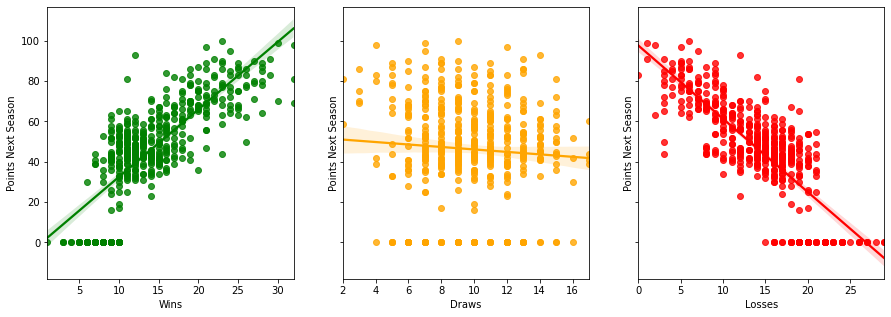

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.regplot(fit_reg=True, x='Wins', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[0], color="Green")
sns.regplot(fit_reg=True, x='Draws', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[1], color="Orange")
sns.regplot(fit_reg=True, x='Losses', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[2], color="Red")

Teams that win more matches in the current season, tend to accumulate more points in the next season. This matches our prediction that teams that perform better (and would thus have more wins) in the current season, tend to perform better (and thus accumulate more points) in the next season. Teams that had less than 10 wins, almost always accumulated 0 points in the next season (because they would get relegated).

Teams that lose more matches in the current season, tend to accumulate less points in the next season. Also, if we look at teams that lost more than 15 matches in a season, we can see that they most likely always accumulated 0 points in the next season (this is because they would get relegated, and would thus not be allowed to play in the premier league in the next season). This matches our prediction that teams that perform worse (and would thus have more losses) in the current season, tend to perform worse (and thus accumulate less points) in the next season.

We can also see that the number of draws, doesn't correlate well to the number of points the team accumulated in the next season.

We should also expect to see a similar relationship between the number of points a team receives in the current season and the number of points the team receives in the next season:

<AxesSubplot:xlabel='Points', ylabel='Points Next Season'>

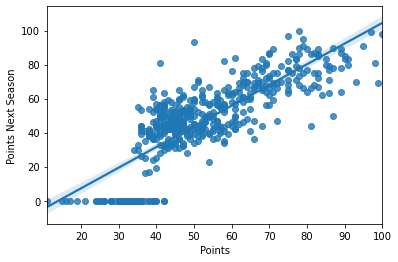

In [52]:
sns.regplot(fit_reg=True, x='Points', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan])

Similar to the previous `Wins Vs Points Next Season` graph, teams that accumulate more points in the current season tend to score more points in the next season. Also, teams that accumulated less than 40 points tend to get 0 points in the next season, because they would get relegated.

### Comparing Goals Scored and Goal Difference to future Performance

<AxesSubplot:xlabel='Goal Difference', ylabel='Points Next Season'>

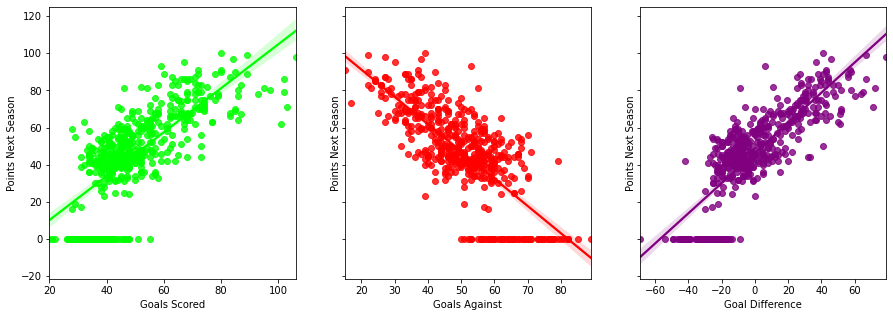

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.regplot(fit_reg=True, x='Goals Scored', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[0], color="Lime")
sns.regplot(fit_reg=True, x='Goals Against', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[1], color="Red")
sns.regplot(fit_reg=True, x='Goal Difference', y='Points Next Season', data=allStatsPerYear[allStatsPerYear["Points Next Season"] != np.nan], ax=ax[2], color="Purple")

From the above graphs we can see that there is a positive relationship between the number of goals a team scored in the current season with the number of points the team accumulated in the next season. Teams that scored less than 40 goals almost always accumulated 0 points in the next season, meaning that they were relegated before the next season. Similarly, teams with a very high goal difference tend to accumulate more points in the next season, and teams with a goal difference less than `-20`, tend to always get relegated. This is consistent with our prediction that teams that perform well in the current season tend to perform well in the next season.

<AxesSubplot:xlabel='Points', ylabel='Count'>

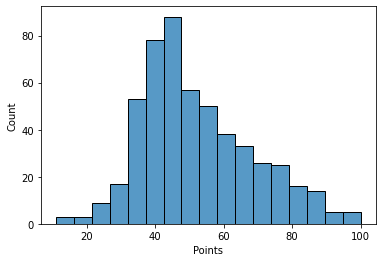

In [54]:
sns.histplot(x='Points', data=allStatsPerYear)

This is a graph displaying the average points teams get per season over the years 1995 to 2020. We see that most teams on average received 40 to 50 points per season. 

<AxesSubplot:xlabel='Goal Difference', ylabel='Count'>

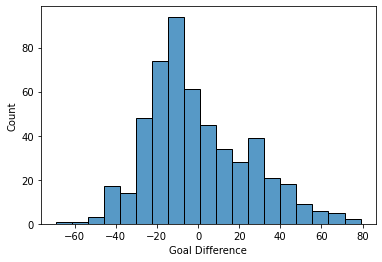

In [55]:
sns.histplot(x='Goal Difference', data=allStatsPerYear)

This graph plots the average goal difference per team over the years 1995 to 2020. It has a similar shape as the graph above and it is reasonable because of what we established earlier: higher goal difference = more points. Since on average teams receive 40-50 points per season, their goal difference sits around the same area which is around -10 goal difference per season.

## Comparing the effect of Transfer related variables to future Performance

### Comparing Amount Spent, Amount Received and Profit to future Performance

<AxesSubplot:xlabel='Profit', ylabel='Count'>

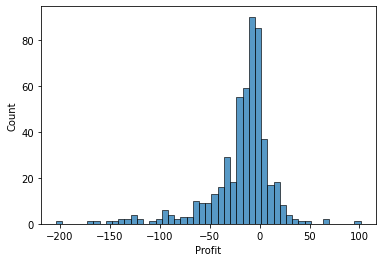

In [56]:
sns.histplot(x='Profit', data=allStatsPerYear)

This graph displays the average profit teams receive per transfer window over the range of years from 1995 to 2020. In our project, we define `Profit` as `Amount Received` - `Amount Spent`. From this plot, we see that most teams on average had a negative profit (around -10 million). This is completely normal and what we expected because the purpose of a transfer window is to improve your team. And one efficient way is to bring in better players. Therefore, most teams end up spending more per transfer window leading to an overall negative profit.

<AxesSubplot:xlabel='Profit', ylabel='Points'>

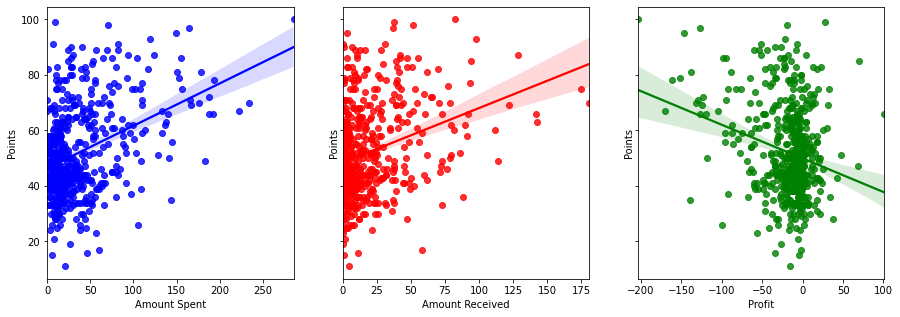

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.regplot(fit_reg=True, x='Amount Spent', y='Points', data=allStatsPerYear, ax=ax[0], color="Blue")
sns.regplot(fit_reg=True, x='Amount Received', y='Points', data=allStatsPerYear, ax=ax[1], color="Red")
sns.regplot(fit_reg=True, x='Profit', y='Points', data=allStatsPerYear, ax=ax[2], color="Green")

In this first graph, we plotted the relationship between the `Amount Spent` by clubs with the amount of `Points` they get in a season. Here we see that most of the data are clustered around the left side of the graph. We also plotted a linear regression line and it seems to be uptrend. This shows that more money spent on transfers = more points in a season. However, there are also other factors that contribute to this uptrend. Since our data ranges from the year 1995 to 2020, the world economy also increases which leads to increase in the value of money. Therefore, over time teams end up spending more money because the value of players increase with time. As for outliers, there are a couple outliers in the graph. Within those outliers, it shows that some teams spent little to none in a transfer window and they still end up getting close to 100 points in a season.

As for the second graph, we plotted the relationship between `Amount Received` and `Points`. To briefly describe what `Amount Received` is, it is when teams receive money from selling or transfering players out of the team. Similar to the first graph, we see a large cluster of data on the left side of the graph, showing that most teams only receive about 25 million or less per transfer window. Combining the first two graphs, we plotted the `Profit` and `Points`. This time, we see a negative trend line and a large group of data clustered between `-50` and `20` million. This shows that most teams end up spending more than what they receive in a transfer window. However, this is completely reasonable because soccer teams do not earn most of their revenue from transfer windows, they benefit from tickets, sponsorships and many other factors. Therefore, it is completely normal for teams to have a higher `Amount Spent` compared to `Amount Received`, resulting in a negative `Profit`. As for the relationship between `Profit` and `Points`, we see that there is a slight negative trendline. Although this shows that having a more negative profit (more `Amount Spent`) result in more `Points` per season, it is more conclusive to describe that there is a weak relationship between the two variables because of the outliers.

### Comparing Amount Spent to Future Performance accounting for Seasonal Bias

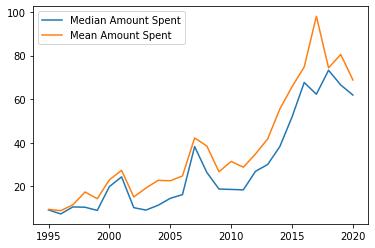

In [58]:
years = []
medianAmountsSpent = []
meanAmountsSpent = []
for year in allStatsPerYear.groupby("Season")["Amount Spent"].median().keys():
    years.append(year)
    medianAmountsSpent.append(allStatsPerYear.groupby("Season")["Amount Spent"].median()[year])
    meanAmountsSpent.append(allStatsPerYear.groupby("Season")["Amount Spent"].mean()[year])
plt.plot(years,medianAmountsSpent,label="Median Amount Spent")
plt.plot(years,meanAmountsSpent,label="Mean Amount Spent")
plt.legend()

First, we can see that every year, the mean amount spent is higher than the median amount spent. This means that there are a small number of teams that have spent a lot more than the other teams every season.

Also we can clearly see that the mean and median amount spent by teams during the transfer window has increased through the years. Thus, if we want to understand how the amount spent during a transfer window affects the number of points a team will receive, we need to remove this underlying bias caused by the season/year that the club spent its money. So, instead of comparing the amount spent by a club to the number of points they will accumulate in that season, let us compare the difference between the amount the team spent from the mean amount spent for that year, and the number of points they will accumulate in that season.

In [59]:
meanAmounts = allStatsPerYear.groupby("Season")["Amount Spent"].mean()
maxPoints = allStatsPerYear.groupby("Season")["Points"].max()
allStatsPerYear["Amount Spent more than Mean Amount"] = allStatsPerYear.apply(lambda row: row["Amount Spent"]-meanAmounts[row["Season"]], axis=1)
allStatsPerYear["Amount Spent more than Mean Amount"].describe()

count    5.200000e+02
mean     1.578225e-15
std      3.308314e+01
min     -7.439575e+01
25%     -1.599959e+01
50%     -6.538100e+00
75%      7.710775e+00
max      1.876801e+02
Name: Amount Spent more than Mean Amount, dtype: float64

<AxesSubplot:xlabel='Amount Spent more than Mean Amount', ylabel='Points'>

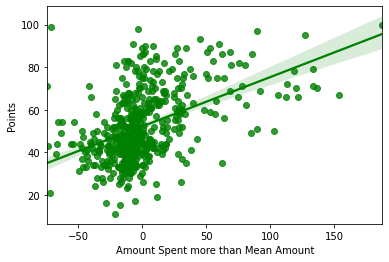

In [60]:
sns.regplot(fit_reg=True, x='Amount Spent more than Mean Amount', y='Points', data=allStatsPerYear, color="green")

We can see that there is a positive relationship between how much a team spent for transfers (more than the mean amount amongst other teams in that season), and the the number of points they recieved in that season. Thus, teams that spend more than other teams in the same season, tend to perform better. This is in agreement with our hypothesis that teams that spend more money during the transfer windows will perform better than teams that spend less money during the transfer windows.

### Comparing the number of players signed, by their position, to future Performance

<AxesSubplot:xlabel='Def', ylabel='Points'>

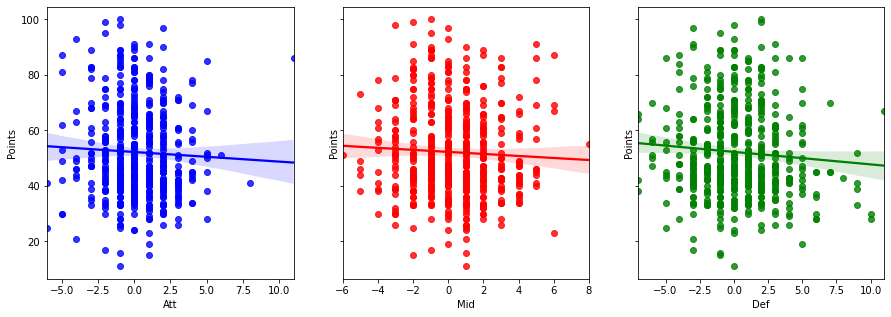

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.regplot(fit_reg=True, x='Att', y='Points', data=allStatsPerYear, ax=ax[0], color="Blue")
sns.regplot(fit_reg=True, x='Mid', y='Points', data=allStatsPerYear, ax=ax[1], color="Red")
sns.regplot(fit_reg=True, x='Def', y='Points', data=allStatsPerYear, ax=ax[2], color="Green")

In the graphs above, we plotted the relationship between players' positions (`Att`, `Mid`, `Def`) and the amount of points a team receive in a season. As you can see, all three graphs display that there are no relationship between the two variables, meaning that there are no effect on how a team performs based on the amount of players in each position. 

### Comparing the number of players signed, by their age, to future Performance

<AxesSubplot:xlabel='36+', ylabel='Points'>

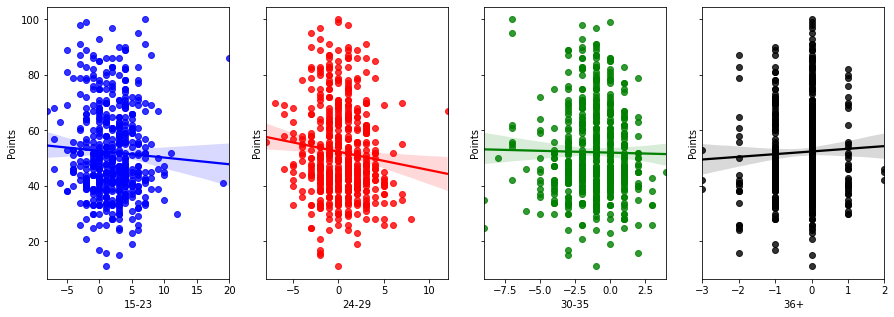

In [62]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.regplot(fit_reg=True, x='15-23', y='Points', data=allStatsPerYear, ax=ax[0], color="Blue")
sns.regplot(fit_reg=True, x='24-29', y='Points', data=allStatsPerYear, ax=ax[1], color="Red")
sns.regplot(fit_reg=True, x='30-35', y='Points', data=allStatsPerYear, ax=ax[2], color="Green")
sns.regplot(fit_reg=True, x='36+', y='Points', data=allStatsPerYear, ax=ax[3], color="Black")

In the graphs above, we plotted the relationship between players' age and overall team performances based on points. We separated into 4 age groups: `15-23`, `24-29`, `30-35`, `36+`. As we can see, the graphs show that there are no relationship between age and points a team receive in a season. 

### Summary of our Findings

From our analysis on a team's current performance we found the following:
1. We noticed that teams that won more games and lost less games in the current season, tend to accumulate more points in the next season. We also couldn't find a relationship between the number of games a team drew in the current season and the number of points they would accumulate in the next season. We also noticed a strong positive relationship between the number of points a team accumulated in the current season and the number of points that team would accumulated in the next season.
2. We also found strong positive relationships between the number of goals a team scored in the current season and the goal difference for a team in the current season, with the number of points they accumulated in the next season. There also existed a strong negative relationship between the number of goals a team let in in the current season and the number of points they received in the next season.

From our analysis on a team's transfer activity we found the following:
1. We found that teams that spend more than the mean amount spent by other teams in the same year tend to accumulate more points in that season. We couldn't find a relationship between the profit a team made by the end of a transfer window of a season, and the number of points the team accumulated in that season.
2. We also couldn't find a relationship between a teams performance in the current season, and the number of players that joined and left the club based on their positions, or their ages.


### Evaluating our Findings

We will use an alpha value of `0.01` for our confidence value.

#### Comparing Wins and Losses to Points Accumulated in the Next Season

In [63]:
allStatsPerYear = allStatsPerYear.rename(columns={"Points Next Season": "FuturePoints"})
allStatsPerYear = allStatsPerYear.rename(columns={"Goals Scored": "GS",
                                                  "Goals Against": "GA",
                                                  "Goal Difference": "GD"})

In [64]:
outcome_1,predictors_1 = patsy.dmatrices('FuturePoints ~ Wins + Losses', allStatsPerYear[allStatsPerYear["FuturePoints"] != np.nan])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [65]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           FuturePoints   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     496.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          3.37e-119
Time:                        21:37:51   Log-Likelihood:                -2035.3
No. Observations:                 500   AIC:                             4077.
Df Residuals:                     497   BIC:                             4089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.5042      6.458      8.595      0.0

1. Since the p-value associated with `Wins` is less than 0.01, and since the co-efficient associated with `Wins` is `1.5483 > 0`, there exists a strong positive relation between the number of games a team wins in the current season, and the number of points they accumulate in the next season. This means that teams that win more games in the current season tend to accumulate more points in the next season, and teams that win lesses games in the current season tend to accumulate less points in the next season.
2. Since the p-value associated with `Losses` is less than 0.01, and since the co-efficient associated with `Losses` is `-2.1991 < 0`, there exists a strong negative relation between the number of games a team wins in the current season, and the number of points they accumulate in the next season. This means that teams that lose more games in the current season tend to accumulate less points in the next season, and teams that lose less games in the current season tend to accumulate more points in the next season.

If we combine these 2 findings, we get that teams that perform better in the current season, tend to perform better in the next season. This is consistent with our hypothesis.

#### Comparing Goals Scored, Goals Against and Goal Difference to Points Accumulated in the Next Season

In [66]:
outcome_1,predictors_1 = patsy.dmatrices('FuturePoints ~ GD + GA + GS', allStatsPerYear[allStatsPerYear["FuturePoints"] != np.nan])
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [67]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:           FuturePoints   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     512.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          1.69e-121
Time:                        21:37:51   Log-Likelihood:                -2030.0
No. Observations:                 500   AIC:                             4066.
Df Residuals:                     497   BIC:                             4079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7571      5.332     11.395      0.0

1. Since the p-value associated with `Goal Difference (GD)` is less to 0.01, and since the co-efficient associated with `Goal Difference` is `0.5511`, there exists a strong positive relation between the goal difference of a team in the current season, and the number of points they accumulate in the next season. This means that teams with a higher goal difference in the current season tend to accumulate more points in the next season, and teams with a lower goal difference in the current season tend to accumulate less points in the next season.
2. Since the p-value associated with `Goals Against (GA)` (or `Goals Conceded`) is less than 0.01, and since the co-efficient associated with `Goals Against` is `-0.4184 < 0`, there exists a strong negative relation between the number of goals a team conceded in the current season, and the number of points they accumulate in the next season. This means that teams that concede more goals in the current season tend to accumulate less points in the next season, and teams that concdede less goals in the current season tend to accumulate more points in the next season.
3. Since the p-value associated with `Goals Scored (GS)` is equal to 0.01, there doesn't exist enough evidence to show that the number of goals scored by a team in the current season is related to number of points the team will accumulate in the next season. If we didn't consider `Goal Difference (GD)`, we found that the p-value associated with `Goals Scored` was less than 0.01, and the co-efficient associated with it was `0.6837 > 0` (so without considering `Goal Difference`, we could have concluded that there was a strong positive relationship between the number of goals a team scored in the current season and the number of points the team accumulates in the next season).

The fact that the p-value of `Goals Scored` was not less than our alpha value, when we considered `Goal Difference`, could be because `Goal Difference` is a better metric to measure a team's overall offensive (`Goals Scored`) and defensive (`Goals Conceded`) stats in a season. Since the relationship between the number of goals conceded by a team in the current season, and the number of points accumulated by the team in the next season wasn't affected by considering `Goal Difference`, we can concluded `Goal Difference` and `Goals Conceded` in the current season have a strong relationship with the number of points a team will accumulate in the next season. This means teams with better defensive stats than other teams, but worse offensive stats, are more likely to accumulate more points in the next season than teams with better offensive stats and worse defensive stats.

#### Comparing Amount Spent and Profit to Points Accumulated

In [68]:
allStatsPerYear = allStatsPerYear.rename(columns={"Amount Spent": "Spent", "Amount Spent more than Mean Amount":"SpentMoreThanMean"})

In [69]:
outcome_1,predictors_1 = patsy.dmatrices('Points ~ Spent + Profit', allStatsPerYear)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [70]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     47.63
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.04e-19
Time:                        21:37:51   Log-Likelihood:                -2147.5
No. Observations:                 520   AIC:                             4301.
Df Residuals:                     517   BIC:                             4314.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0500      0.911     50.546      0.0

1. Since the p-value associated with `Spent` is less than 0.01, and since the co-efficient associated with `Wins` is `0.1995 > 0`, there exists a positive relation between the amount a team spends in the current season, and the number of points they accumulate in the next season. This means that teams that spend more money in the transfer window tend to accumulate more points, and teams that spend less money in the transfer window tend to accumulate less points.
2. Since the p-value associated with `Profit` is greater than 0.01, we cannot conclude if there exists a relationship between the profit accumulated by the end of the transfer window by a team, and the number of points they accumulate int he upcoming season.

When we performed our analysis, we noticed a positive relationship between the amount spent by a team and the number of points they received, but we didn't notice a relationship between the profit gained by a team and the points they accumulated. This agrees with our evaluation. Most teams don't have a net profit at the end of the transfer window (in our dataset, we assigned a negative value to the profits variable if a team made a losse). High spending teams often spend a lot of money to buy star players and make money in the transfer window by selling backup players and youth players for lower prices to other teams. Most other teams can't afford to spend a lot of money in the transfer windows. Thus high spending teams that accumulate a lot of points, won't necessarily have a profit because of the number of transactions that they do throughout the transfer window, and low spending teams won't necessarily have either a profit or a loss because they wouldn't have too money to invest in the transfer window. Since high spending teams tend to accumulate more points, and low spending teams to accumulate less points, and since it is hard to distinguish between high spending teams and low spending teams just based on their profit, it goes to show that it would also be hard to relate a team's profit in the transfer market to the number of points they would accumulate in the season after the corresponding transfer window.

#### Comparing Amount Spent and Amount Spent Relative to Other Teams to Points Accumulated

In [71]:
outcome_1,predictors_1 = patsy.dmatrices('Points ~ Spent + SpentMoreThanMean', allStatsPerYear)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [72]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     72.20
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           2.22e-28
Time:                        21:37:51   Log-Likelihood:                -2127.5
No. Observations:                 520   AIC:                             4261.
Df Residuals:                     517   BIC:                             4274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            51.8240      1.16

We can now see that if we don't consider the year (teams were more likely to spend lesser money during the transfer window in earlier years, and more money in later years), we can't find a relationship between the amount spent by a team and the number of points they accumulated in that season.
But, the p-value for `SpentMoreThanMean` is less than `0.01`, and the co-efficient associated with `SpentMoreThanMean` is `0.2224 > 0`. Thus, there exists a strong positive relationship between the amount a team spends __relative to other teams__, and the number of points they accumulate in the upcoming season.
This too is consitent with our hypothesis that teams that spend more money in the transfer window tend to perform better, and teams that spend less money in the transfer window tend to perform worse.

#### Comparing Net Increase in players based on Position to Points Accumulated

In [73]:
outcome_1,predictors_1 = patsy.dmatrices('Points ~ Att + Def + Mid', allStatsPerYear)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [74]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.570
Date:                Fri, 10 Dec 2021   Prob (F-statistic):              0.196
Time:                        21:37:51   Log-Likelihood:                -2189.2
No. Observations:                 520   AIC:                             4386.
Df Residuals:                     516   BIC:                             4403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.3930      0.727     72.079      0.0

We can see that the p-value associated with the net increase in the number of players signed by position for a team is greater than `0.01` for Attackers, Defenders and Midfielders. This is consitent with our analysis that there doesn't exist a relation between net increase in the number of attackers, defenders or midfielders for a team (by signing and selling players in the transfer window), and the number of points the team accumulates.

Since teams that sign more players would have larger squad depths and options, they would be less affected if some of their players were injured than teams with smaller squad sizes. Furthermore if individual players in large teams aren't performing well, they could be replaced by other players in the team who play in the same position. So, teams with lot more options for each position (and thus larger squad sizes) wouldn't be dependent on individual players performing well. This is why we assumed teams with a net increase in the number of attackers/midfielders/defenders signed would perform well. From our analysis and the above evaluation, it goes to show that there doesn't exist enough evidence to show that teams with a larger net increase in the number of attackers/midfielders/defenders (due to the transfer window) would perform better than teams with a smaller net increase in the number of attackers/midfielders/defenders (a net increase which is negative would mean that the team was left with 3 less players in that position after the transfer window).

#### Comparing Net Increase in players based on Age to Points Accumulated

In [75]:
allStatsPerYear = allStatsPerYear.rename(columns={"15-23":"Between15And23",
                                                  "24-29":"Between24And29",
                                                  "30-35":"Between30And35",
                                                  "36+": "Above36"})

In [76]:
outcome_1,predictors_1 = patsy.dmatrices('Points ~ Between15And23 + Between24And29 + Between30And35 + Above36', allStatsPerYear)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [77]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.996
Date:                Fri, 10 Dec 2021   Prob (F-statistic):             0.0938
Time:                        21:37:51   Log-Likelihood:                -2187.5
No. Observations:                 520   AIC:                             4385.
Df Residuals:                     515   BIC:                             4406.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         52.8702      0.983     53.

We can see that the p-value associated with the net increase in the number of players signed by age for a team is greater than `0.01` for all age groups. This is consitent with our analysis that there doesn't exist a relation between net increase in the number of players based on age group for a team (by signing and selling players in the transfer window), and the number of points the team accumulates.

Similar to the previous case, we assumed that teams with larger squad sizes would perform better than teams with smaller squad sizes. Furthermore, we also assumed that teams that sign more players between the ages 24 and 29 (players that are reaching their prime) would perform better than teams that sign less players that have reached their prime or would reach their prime soon. We also assumed that teams that signed more relatively older players would perform worse than teams that signed lesser older players (and more younger players instead). From our analysis and from the above evaluation, it goes to show that there isn't exist enough evidence to show that teams that signed more players in their prime (24-29) would perform better than teams that signed less players  in their prime (24-29). There also doesn't exist enough evidence to show that teams that signed more players past their prime (30-35) or close to retirement (36+) perform worse than teams that signed less players past their prime or close to retirement.

# Ethics & Privacy

Our Match Results (1995 - 2019 and 2020) and All Transfers datasets were collected in primarily two ways: web scraping premierleague.com, an up-to-date website managed by the English Premier League, and by accessing pre-existing datasets retrieved from publicly available resources, released based on Premier League privacy and disclosure agreements. Thus, we have minimal privacy concerns with our data collection methodologies. Since we collected our data from public websites, we hope that the original owners followed privacy laws while collecting the dat themselves. We also hope that the original owners were ethical in their means of collecting and using the data.

This does not discount the inherent biases present in our datasets. For example, the All Transfers dataset was more comprehensive, inclusive of all transfer activity, for older, more renown clubs such as Manchester United or Chelsea. However, even for these clubs, there were several missing entries for young, up-and-coming players. This made it difficult to measure future club performance based on earlier club investments on future prospects, despite a majority of seasonly transfers being recruitement of young prospects. 

Our post-analysis is also affected. We concluded that there wasn't a strong positive correlationship between age of player transfers and performance in a future season. Taking our earlier points into account, however, this may not be completely true. Since we removed the Nan entires in our data cleaning process, we removed a lot of the young prospect transfers, a plausible reason for a lack of correlation.

The All Transfers data could have also been affected by COVID-19. Several Premier League clubs were affected financially due to the outbreak, i.e. little to no stadium attendance so low ticket sales. As a result, the transfer activity for the 2019-2020 and 2020-2021 seasons would have been skewed in comparison to the previous seasons.

To consider biases caused by financial backing of clubs, we did not restrict ourselves to measuring the performance of a club merely based on their previous performance, but also based on the amount of money they invested in the transfer market. We couldn't gather enough data on how clubs were affected by injuries, because we were considering every team's performance since 1995, but it is important to note that player injuries have a major impact on team performance, and not accounting for it, may leave certain biases in our conclusions.

# Conclusion & Discussion

By analyzing premier league matches that have taken place from 1995-2020, and the transfer activities of the teams involved in these matches, we can conclude that the number of points a team will accumulate in the upcoming season of the premier league is strongly related to the following factors:

__1. Conclusion 1: Winning More Games__

    Teams that win more games in the current season tend to accumulate more points in the next season. Teams that win less games in the current season tend to accumulate less points in the next season.
    
__2. Conclusion 2: Losing less Games__

    Teams that lose more games in the current season tend to accumulate less points in the next season. Teams that lose less games in the current season tend to accumulate more points in the next season.

__3. Conclusion 3: Conceding Less Goals__

    Teams that concede more goals in the current season tend to accumulate less points in the next season. Teams that concede less goals in the current season tend to accumulate more points in the next season.
    
__4. Conclusion 4: Maintaining a large Goal Difference__

    Teams with a lower goal difference in the current season tend to accumulate less points in the next season. Teams with a higher goal difference in the current season tend to accumulate more points in the next season.
    
__5. Conclusion 5: Investing more on Transfers__

    Teams that spend more on transfers during the upcoming transfer window accumulate more points in the next season. Teams that spend less on transfers during the upcoming transfer window accumulate less points in the next season.
    
    
There a few disadvantages with our conclusions. We were hoping to find a novel approach for new teams to perform better in upcoming seasons, but most of our conclusions only show us that the Premier League isn't volatile. Teams that perform well in the current season, by winning more games and losing less games tend to perform better in the next season. This doesn't help us provide an approach for new and upcoming teams to succeed in the league. Since the creation of the modern form of the Premier League (20 teams and 380 matches) in 1995, the league has been dominated by 6 teams: 
1. Chelsea
2. Manchester United
3. Manchester City
4. Tottenham Hotspurs
5. Arsenal
6. Liverpool. 

Only 5 times have other teams placed in the top 3 of the league since 1995: 
1. Leicester City (Placed 1st in 2016/2017)
2. Newcastle United (Placed 2nd in 1995/1996)
3. Newcastle United (Placed 2nd in 1996/1997)
4. Leeds United (Placed 3rd in 1999/2000)
5. Newcastle United (Placed 3rd in 2002/2003)

Our first two conclusions are consitent with the reality that the Premier League is stable, because teams that perform better in one season, tend to perform better in the next season, and teams that perform worse in one season, tend to perform worse in the next season.

Our 5th conclusion, also doesn't provide a realistic approach for new and upcoming clubs to perform better in upcoming seasons. If a team wishes to invest more money than other teams in the transfer window, then they need to have made a lot of money during the current season. Most star players already play for clubs that perform well, so selling players during the transfer market isn't an option for new and upcoming clubs. Revenue from tickets and brand deals is often higher for teams that are already performing well, than for underperforming teams and new and upcoming teams. Finally, rewards from winning the league and other local cup tournaments often go to teams that are already performing well. So conclusions 1, 2, and 5, only show that teams that are already performing well, or are already rich, will continue to perform better.

But, conclusions 3 and 4 show us something new. Teams that conceded less goals in the one season and maintained larger goal differences often performed better in the next season. This shows that if a new and upcoming team, or an under-performing team wishes to perform better in the next season, they should invest in improving their defensive performance, rather than their offensive performance.

Conclusion 5 also might seem interesting with the current news revolving around premier league football. Newcastle United returned to the premier league in 2017 and are currently in 19th place (out of 20 teams). They placed 10th in the 2017/2018 season, but revolved around 12th and 13th from 2018 to 2020. On October 7th 2021, Newcastle received a financial takeover, wherein the new owners bought the club for ￡300 million. The last time a team in the premier league had a financial takeover was when Manchester city was taken over in 2008, when they were bought for ￡81.6 million. Since 2008, Manchester City have spent £1.3billion on transfers, and won the premier league 5 times (4 times in the last 5 years). Newcastle United could end also up in a similar situation, by becoming one of the best clubs in the Premier League.

There was a lot of data related to individual players' performances, indidividual players' playstyles, managers' win/loss per game ratios, and home/away results that we wanted to use to improve our findings, but it was hard to find player performance and playstyle information for every player in the premier league since 1995, and managerial stats for every team coach/manager for every team since 1995 (lots of teams release and sign new managers frequently). We were also hoping to find that signing players in specific positions or age groups could improve a team's performance, but this wasn't the case. Though some of our conclusions suggest that a teams performance in the upcoming season is directly related to the performance in the current season, the most important and interesting conclusion is that teams with better defensive performances in the current season tent to have better overall performances in the next season. 

# Team Contributions

We met every week either in person or on Discord to discuss what we had accomplished for our project, and what we wished to change or improve. Initially all 4 of us worked on research to find datasets and interesting data science questions for our project. During the data cleaning task, Manav worked on cleaning up the Match Results dataset, Dhanush worked on the Web Scraper to scrape MatchResults2020, Justin worked on cleaning up the Transfers dataset, and Vishaal worked on combining the datasets together and the writeup. During Exploratory Data Analysis, Manav and Vishaal worked on the analysis related to performance variables, and Dhanush and Justin worked on analysis related to transfer variables. We all worked on the code and the writeup equally for the final project. We had a great time working with each other, and we'd love to work on a task like this again in the future. 